<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/1%20Linear%20Regression/Linear_Regression_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## What is Linear Regression

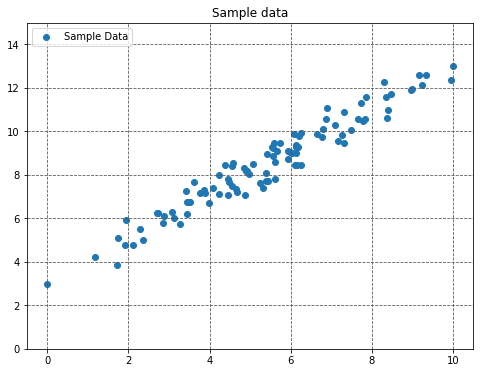

In [2]:
# Generate sample data
X, y = datasets.make_regression(n_samples=100,    #number of samples
                                n_features=1,     #number of features
                                noise=10,         #bias and standard deviation of the guassian noise
                                random_state=0)   #set for same data points for each run

# Scale feature x from 0 to 20, and y from 0 to 100
bias = 3.0
X = np.interp(X, (X.min(), X.max()), (0, 10))
y = np.interp(y, (y.min(), y.max()), (0, 10))
y = y + bias


fig = plt.figure(figsize=(8,6))
plt.ylim(0, 15)
plt.scatter(X, y, label='Sample Data')
plt.grid(which='major', color='#555555', linestyle='--')
plt.title('Sample data')
plt.legend(loc='upper left')
plt.show()

Score: 0.9417294727711081
Coefficient (theta_1): [0.9796368]
Intercept (theta_0): 3.2119370881393365


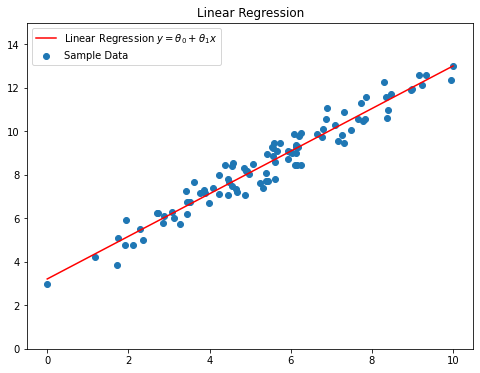

In [3]:
# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
score = model.score(X, y, sample_weight=None)
print("Score:", score)
print("Coefficient (theta_1):", model.coef_)
print("Intercept (theta_0):", model.intercept_)

# Plot the estimated linear regression line with matplotlib:
fig = plt.figure(figsize=(8,6))
plt.ylim(0, 15)
plt.scatter(X, y, label='Sample Data')
plt.plot(xfit, yfit, color='r', label=r'Linear Regression $y=\theta_0+\theta_1 x$');
# plt.grid(which='major', color='#555555', linestyle='--')
plt.legend(loc='upper left')
plt.title('Linear Regression')
plt.savefig("linear_regression.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

**Hypothesis function for Linear Regression**

After run fit() of LinearRegression model, the results are available from the attributes of the model, see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. 

And the Hypothesis function can be obtained as following,

$\theta_1$ `= model.coef_`

$\theta_0$ `= model.intercept_`

$y = \theta_0 + \theta_1 x$

## Diabetes Dataset



In [4]:
diabetes = datasets.load_diabetes()

In [5]:
print("Data:", diabetes.data.shape)
print("Target:", diabetes.target.shape)
print("Features:", diabetes.feature_names)
print("Description:", diabetes.DESCR)
print("Keys:", diabetes.keys())

Data: (442, 10)
Target: (442,)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      

In [6]:
diab = pd.DataFrame(diabetes.data)
diab.columns = diabetes.feature_names
diab['target'] = diabetes.target


In [7]:
print(diab.head())
print(diab.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

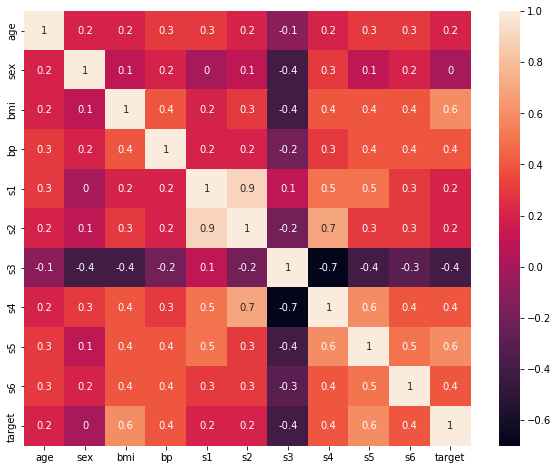

In [8]:
correlation_matrix = diab.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data=correlation_matrix.round(1), annot=True)
plt.savefig("diabetes_heatmap.svg", format="svg", transparent=True, bbox_inches='tight')

From the heatmap above, it's noticed the variable ***bmi*** has 0.6 correlation with the output variable -- ***target***; and ***s5*** also has 0.6 correlation with ***target***.

X1: (442, 1)
X2: (442, 1)
y1: (442,)
y1: (442,)


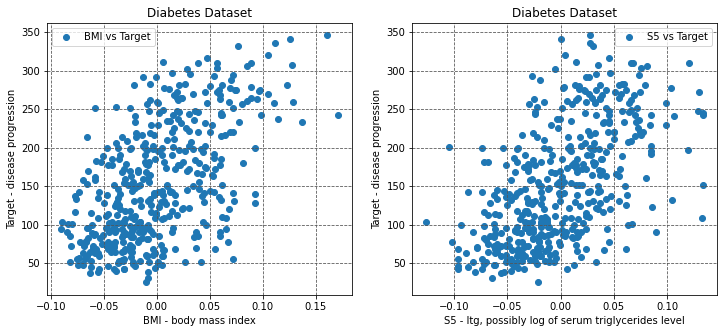

In [9]:
# diabetes.feature_names = 
# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X1 = diab.loc[:, ['bmi']].values
X2 = diab.loc[:, ['s5']].values
y1 = y2 = diabetes.target
print("X1:", X1.shape)
print("X2:", X2.shape)
print("y1:", y1.shape)
print("y1:", y2.shape)

fig = plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X1, y1, label='BMI vs Target')
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('BMI - body mass index')
plt.ylabel("Target - disease progression")
plt.title('Diabetes Dataset')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(X2, y2, label='S5 vs Target')
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('S5 - ltg, possibly log of serum triglycerides level')
plt.ylabel("Target - disease progression")
plt.title('Diabetes Dataset')
plt.legend(loc='best')
plt.show()

## Linear Regression on Diabetes Dataset

### Single feature

Coefficient: [949.43526038]
Intercept: 152.1334841628967
Score: 0.3439237602253803


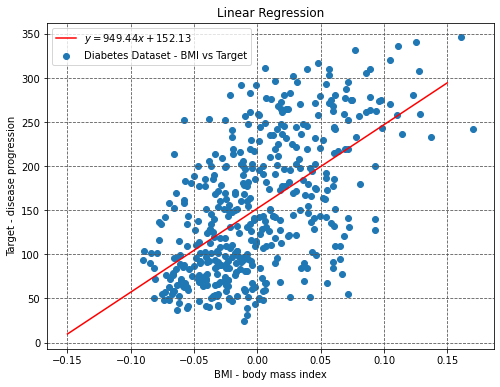

In [10]:
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
x1fit = np.linspace(-0.15, 0.15, 100)
y1fit = x1fit * model.coef_ + model.intercept_
score = model.score(X1, y1)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("Score:", score)

fig = plt.figure(figsize=(8,6))
plt.scatter(X1, y1, label='Diabetes Dataset - BMI vs Target')
plt.plot(x1fit, y1fit, color='r', label='$y=%0.2fx + %0.2f$'% (model.coef_, model.intercept_))
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('BMI - body mass index')
plt.ylabel("Target - disease progression")
plt.legend(loc='upper left')
plt.title('Linear Regression')
plt.savefig("linear_regression_diabetes1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Coefficients: [916.13872282]
Intercept: 152.13348416289628
Score: 0.32022405096453443


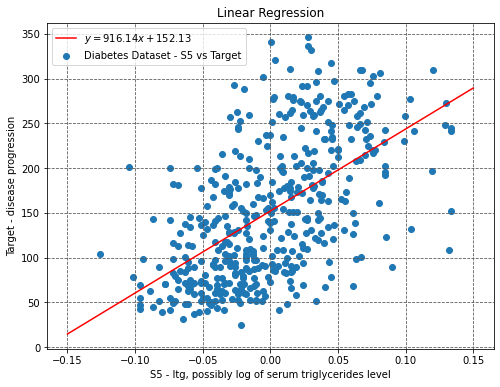

In [11]:
model.fit(X2, y2)
x2fit = np.linspace(-0.15, 0.15, 100)
# y2fit = model.predict(x2fit[:, np.newaxis])
y2fit = x2fit * model.coef_ + model.intercept_
score = model.score(X2, y2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Score:", score)

fig = plt.figure(figsize=(8,6))
plt.scatter(X2, y2, label='Diabetes Dataset - S5 vs Target')
plt.plot(x2fit, y2fit, color='r', label='$y=%0.2fx+%0.2f$'% (model.coef_, model.intercept_))
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('S5 - ltg, possibly log of serum triglycerides level')
plt.ylabel("Target - disease progression")
plt.legend(loc='upper left')
plt.title('Linear Regression')
plt.savefig("linear_regression_diabetes2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Multiple feature

In [12]:
# diabetes.feature_names = 
# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X3 = diab.loc[:, diabetes.feature_names].values
y3 = diabetes.target

model.fit(X3, y3)
coefficient = pd.Series(model.coef_)
coefficient.index = diabetes.feature_names
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:")
print(coefficient.to_string())
print("Score:", model.score(X3, y3) )

Intercept: 152.1334841628965
Coefficients:
age    -10.012198
sex   -239.819089
bmi    519.839787
bp     324.390428
s1    -792.184162
s2     476.745838
s3     101.044570
s4     177.064176
s5     751.279321
s6      67.625386
Score: 0.5177494254132934


In this example, there are 10 variables $x_1, x_2, ..., x_{10}$. 
coef_ is the weight for each variable, there are also 10 values, noted as $\theta_1, \theta_1, ..., \theta_{10}$. And the intercept is noted as $\theta_0$, then the Hypothesis function is:

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_{10}x_{10} $

This function can be use this function to make predictions.

## Train-Test Datasets and Evaluation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=2, train_size = .75)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 10)
(331,)
(111, 10)
(111,)


Fit the model with Train set:

In [14]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(score)

0.5360245327873312


Then evaluate model on testset:

In [15]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)

0.442960870613316


The score is the Coefficient of Determination of the prediction. It's denoted as $R^2$, and defined as:

$R^2 = 1 - \frac{\Sigma (y_{true}-y_{pred})^2}{\Sigma (y_{true}-y_{mean})^2}$


The best possible score is 1.0, but it can be negative when the prediction is bad enough.

In [16]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.442960870613316
